In [142]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import pandas as pd
import re
import os
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from tqdm import tqdm,trange
from __future__ import absolute_import,division,print_function,unicode_literals
import tensorflow as tf
import os
import datetime
import tensorflow_hub as hub
import csv

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
FILE_PATH =  "drive/MyDrive/Sunidhi-entity_recognition"
TRAIN_FILE = FILE_PATH + "/train.txt"
TEST_FILE = FILE_PATH + "/test.txt"
col_names = ["Tokens","IOB_Tags"]
train_data = pd.read_csv(TRAIN_FILE, sep = '\t', names = col_names,encoding = "ISO-8859-1")
train_data

,Tokens,IOB_Tags
0,@paulwalk,O
1,It,O
2,'s,O
3,the,O
4,view,O
...,...,...
57888,39,O
57889,GMT+0000,O
57890,(,O
57891,UTC,O


In [145]:
df = train_data.groupby('IOB_Tags').size().reset_index(name='counts')
df

,IOB_Tags,counts
0,B-corporation,196
1,B-creative-work,110
2,B-group,230
3,B-location,494
4,B-person,566
5,B-product,130
6,I-corporation,43
7,I-creative-work,150
8,I-group,132
9,I-location,226


In [146]:
test_data = pd.read_csv(TEST_FILE, header = None, delimiter="\t", names = ['Tokens'], quoting=csv.QUOTE_NONE, encoding='utf-8')
test_data

,Tokens
0,&
1,gt
2,;
3,*
4,The
...,...
23389,with
23390,this
23391,dress
23392,code


In [147]:
train_data['IOB_Tags'].unique()

array(['O', 'B-location', 'I-location', nan, 'B-group', 'B-corporation',
       'B-person', 'B-creative-work', 'B-product', 'I-person',
       'I-creative-work', 'I-corporation', 'I-group', 'I-product'],
      dtype=object)

In [148]:
train_data.isnull().sum()

Tokens      2168
IOB_Tags    2162
dtype: int64

In [149]:
input_data = train_data.fillna(method="ffill")
input_data

,Tokens,IOB_Tags
0,@paulwalk,O
1,It,O
2,'s,O
3,the,O
4,view,O
...,...,...
57888,39,O
57889,GMT+0000,O
57890,(,O
57891,UTC,O


In [150]:
input_data.describe()

,Tokens,IOB_Tags
count,57893,57893
unique,13794,13
top,.,O
freq,2134,55140


In [151]:
f = open(TRAIN_FILE, 'r') 
content = f.read()

In [152]:
a = re.split("\s|(?<!\d)[,.](?!\d)['O']", content)
new_a = []
for i in a:
#     print(i)
    if (i != None):
        new_a.append(i)
    else:
        continue

print(new_a)

['@paulwalk', 'O', 'It', 'O', "'s", 'O', 'the', 'O', 'view', 'O', 'from', 'O', 'where', 'O', 'I', 'O', "'m", 'O', 'living', 'O', 'for', 'O', 'two', 'O', 'weeks', 'O', '.', 'O', 'Empire', 'B-location', 'State', 'I-location', 'Building', 'I-location', '=', 'O', 'ESB', 'B-location', '.', 'O', 'Pretty', 'O', 'bad', 'O', 'storm', 'O', 'here', 'O', 'last', 'O', 'evening', 'O', '.', 'O', '', '', 'From', 'O', 'Green', 'O', 'Newsfeed', 'O', ':', 'O', 'AHFA', 'B-group', 'extends', 'O', 'deadline', 'O', 'for', 'O', 'Sage', 'O', 'Award', 'O', 'to', 'O', 'Nov', 'O', '.', 'O', '5', 'O', 'http://tinyurl.com/24agj38', 'O', '', '', 'Pxleyes', 'B-corporation', 'Top', 'O', '50', 'O', 'Photography', 'O', 'Contest', 'O', 'Pictures', 'O', 'of', 'O', 'August', 'O', '2010', 'O', '...', 'O', 'http://bit.ly/bgCyZ0', 'O', '#photography', 'O', '', '', 'today', 'O', 'is', 'O', 'my', 'O', 'last', 'O', 'day', 'O', 'at', 'O', 'the', 'O', 'office', 'O', '.', 'O', '', '', '4Dbling', 'B-person', "'s", 'O', 'place', 'O',

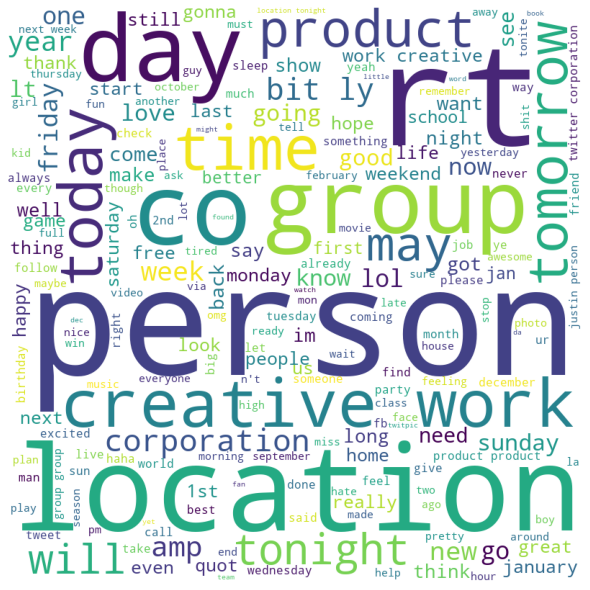

In [153]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

words1 = ''
for i in range(len(new_a)):
  new_a[i] = new_a[i].lower()
words1 += " ".join(new_a)+" "

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(words1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# CLASS IMBALANCE

In [154]:
input_data['Tokens'].value_counts()

.                2134
,                1142
:                1053
the              979 
!                949 
                ...  
3.0              1   
eminem           1   
@nabilahJKT48    1   
eve              1   
Feat             1   
Name: Tokens, Length: 13794, dtype: int64

<Figure size 576x432 with 0 Axes>

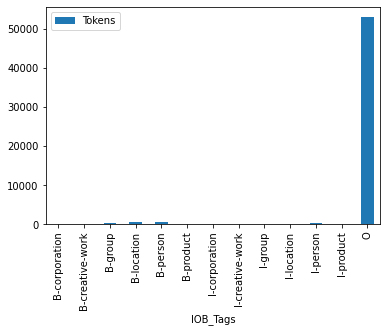

In [155]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
train_data.groupby('IOB_Tags').count().plot.bar(ylim=0)
plt.show()

In [156]:
X_train,X_test = train_test_split(input_data, test_size = 0.2, random_state=4)

**The weights are created to handle the class imbalance in the dataset. The weights are assigned in such a way that the highly represented classes will get assigned a lesser weight and higher weight for the lower represented classes**

In [157]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(input_data['IOB_Tags']),
                                             input_data['IOB_Tags']))

In [158]:
class_weights.sort()

**The highly represented class in this case is 'O' tag which has the lowest weight assigned. Whereas 'I-coporation' is the lowest represented class which has the highest weight assigned to it.**

In [159]:
class_weights

[0.08076365056778549,
 7.826551304582939,
 8.906615384615385,
 15.147305075876504,
 19.362207357859532,
 19.362207357859532,
 22.49145299145299,
 27.320906087777253,
 29.492103922567498,
 33.233639494833525,
 34.25621301775148,
 40.11988911988912,
 103.56529516994634]

In [160]:
input_data['IOB_Tags'].value_counts()

O                  55140
B-person           569  
B-location         500  
I-person           294  
B-group            230  
I-location         230  
B-corporation      198  
I-product          163  
I-creative-work    151  
I-group            134  
B-product          130  
B-creative-work    111  
I-corporation      43   
Name: IOB_Tags, dtype: int64

In [161]:
weights = {}

In [162]:
for index,weight in enumerate(class_weights):
    weights[index] = weight

In [163]:
weights

{0: 0.08076365056778549,
 1: 7.826551304582939,
 2: 8.906615384615385,
 3: 15.147305075876504,
 4: 19.362207357859532,
 5: 19.362207357859532,
 6: 22.49145299145299,
 7: 27.320906087777253,
 8: 29.492103922567498,
 9: 33.233639494833525,
 10: 34.25621301775148,
 11: 40.11988911988912,
 12: 103.56529516994634}

In [164]:
dataset_train = tf.data.Dataset.from_tensor_slices((X_train['Tokens'].values, X_train['IOB_Tags'].values))
dataset_test = tf.data.Dataset.from_tensor_slices((X_test['Tokens'].values, X_test['IOB_Tags'].values))

In [165]:
for text,target in dataset_train.take(50):
    print("Token: {}, Tag: {}".format(text,target))

Token: b'?', Tag: b'O'
Token: b'.', Tag: b'O'
Token: b'will', Tag: b'O'
Token: b'Sorry', Tag: b'O'
Token: b'!!', Tag: b'O'
Token: b'Care', Tag: b'O'
Token: b'@oneduran', Tag: b'O'
Token: b'Check', Tag: b'O'
Token: b':', Tag: b'O'
Token: b'\tO\nRed\tO\nOctober\tO\n', Tag: b'O'
Token: b'update', Tag: b'O'
Token: b'#obsessions', Tag: b'O'
Token: b'alejo', Tag: b'O'
Token: b'Smh', Tag: b'O'
Token: b'Social', Tag: b'O'
Token: b'Biz', Tag: b'O'
Token: b'signing', Tag: b'O'
Token: b'million-year-old', Tag: b'O'
Token: b'bottom', Tag: b'O'
Token: b'the', Tag: b'O'
Token: b'http://fb.me/A25CPleD', Tag: b'O'
Token: b'when', Tag: b'O'
Token: b'our', Tag: b'O'
Token: b'air', Tag: b'O'
Token: b'horrible', Tag: b'O'
Token: b'times', Tag: b'O'
Token: b'hate', Tag: b'O'
Token: b'bump', Tag: b'O'
Token: b'Abangan', Tag: b'O'
Token: b'cool', Tag: b'O'
Token: b'CST', Tag: b'O'
Token: b'dishes', Tag: b'O'
Token: b'Got', Tag: b'O'
Token: b'.', Tag: b'O'
Token: b'and', Tag: b'O'
Token: b'starts', Tag: b'O'


In [166]:
for text,target in dataset_test.take(10):
    print("Token: {}, Tag: {}".format(text,target))

Token: b'like', Tag: b'O'
Token: b'drinks', Tag: b'O'
Token: b'you', Tag: b'O'
Token: b')', Tag: b'O'
Token: b'another', Tag: b'O'
Token: b'Black', Tag: b'O'
Token: b'Sea', Tag: b'I-corporation'
Token: b'when', Tag: b'O'
Token: b'of', Tag: b'O'
Token: b'when', Tag: b'O'


In [167]:
table = tf.lookup.StaticHashTable(initializer=tf.lookup.KeyValueTensorInitializer(keys = tf.constant(["O","B-location", "I-location","B-corporation","B-creative-work","B-group","B-person","B-product","I-corporation","I-creative-work","I-group","I-person","I-product"]),
                                                                                  values = tf.constant([0,1,2,3,4,5,6,7,8,9,10,11,12]),
                                                                                  ),
                                  default_value = tf.constant(-1),
                                  name = "target_encoding"
                                  )
@tf.function
def target(x):
    return table.lookup(x)

In [168]:
def show_batch(dataset, size = 12):
    for batch,label in dataset.take(size):
    print(batch.numpy())
    print(target(label).numpy())

In [169]:
show_batch(dataset_test,5)

b'like'
0
b'drinks'
0
b'you'
0
b')'
0
b'another'
0


In [170]:
def fetch(text,labels):
    return text,tf.one_hot(target(labels),12)

In [171]:
train_data_f = dataset_train.map(fetch)
test_data_f = dataset_test.map(fetch)

In [173]:
next(iter(train_data_f))

(<tf.Tensor: shape=(), dtype=string, numpy=b'?'>,
 <tf.Tensor: shape=(12,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [174]:
train_data,train_labels = next(iter(train_data_f.batch(5)))
train_data,train_labels

(<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'?', b'.', b'will', b'Sorry', b'!!'], dtype=object)>,
 <tf.Tensor: shape=(5, 12), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>)

**Creating an embedding layer here using a pretrained embedding from tensorflow hub which is token based test embedding trained on Google news using 128 dimension embedding layer**

In [175]:
embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
hub_layer = hub.KerasLayer(embedding, output_shape = [128], input_shape = [], dtype = tf.string, trainable = True)
hub_layer(train_data[:1])

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[-0.01335301,  0.11507112,  0.12568313,  0.08377809,  0.09086309,
         0.00680401,  0.00745701, -0.03761704,  0.001426  , -0.02320102,
        -0.01916102, -0.06860708,  0.06106806, -0.02954403,  0.06684007,
         0.04907905,  0.1913872 ,  0.21925023, -0.03164103,  0.04404305,
         0.10488011, -0.13213813, -0.14847316, -0.05258505, -0.03107903,
        -0.06920908, -0.07110307, -0.03124703, -0.05031205, -0.00541301,
         0.03788404,  0.0980591 ,  0.01709602,  0.02554303, -0.05240306,
         0.00775901,  0.07056207, -0.02043602, -0.13800415, -0.09594011,
         0.05483106, -0.14429015, -0.00838601,  0.13393015, -0.12496114,
        -0.0902081 ,  0.12379914, -0.04021505, -0.0923851 ,  0.004194  ,
         0.02831903, -0.03787104, -0.10859912, -0.06061306,  0.003947  ,
         0.13076313, -0.22269624, -0.08585209, -0.01396002, -0.05276906,
         0.08112009,  0.06606907, -0.04183805, -0.01161101,  0.14722016,
 

Creating Creating Feed Forward Neural Network with Keras Sequential Layer

In [176]:
model = tf.keras.Sequential()
model.add(hub_layer)
for units in [128, 128,64,32]:
  model.add(tf.keras.layers.Dense(units, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(12,activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

Using Adam Optimizer

In [177]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [178]:
train_data_f = train_data_f.shuffle(70000).batch(512)
test_data_f = test_data_f.batch(512)

**When weights is passed in the argument, tensorflow uses weighted cross entropy function to evaluate how good a classifier is doing per label.**

We can see how the accuracy and validation accuracy has come down to 84% and 75% respectively, which is not bad as compared to BERT Language Model, which means that after taking care of the class imbalance using weights our model gives better accuracy.

In [179]:
history = model.fit(train_data_f,
                    epochs=10,
                    validation_data=test_data_f,
                    verbose=1,
                    class_weight=weights)

Epoch 1/10
91/91 [==============================] - 12s 118ms/step - loss: 2.5628 - accuracy: 0.1248 - val_loss: 2.4062 - val_accuracy: 0.0098
Epoch 2/10
91/91 [==============================] - 11s 116ms/step - loss: 2.0992 - accuracy: 0.1481 - val_loss: 1.2019 - val_accuracy: 0.8021
Epoch 3/10
91/91 [==============================] - 11s 117ms/step - loss: 1.6171 - accuracy: 0.7291 - val_loss: 1.0709 - val_accuracy: 0.7432
Epoch 4/10
91/91 [==============================] - 11s 116ms/step - loss: 1.3943 - accuracy: 0.7354 - val_loss: 0.9287 - val_accuracy: 0.7701
Epoch 5/10
91/91 [==============================] - 11s 116ms/step - loss: 1.1578 - accuracy: 0.7501 - val_loss: 0.9522 - val_accuracy: 0.7442
Epoch 6/10
91/91 [==============================] - 11s 116ms/step - loss: 0.9291 - accuracy: 0.7852 - val_loss: 0.9368 - val_accuracy: 0.7475
Epoch 7/10
91/91 [==============================] - 11s 116ms/step - loss: 0.8205 - accuracy: 0.8097 - val_loss: 0.8641 - val_accuracy: 0.7717

In [180]:
len(list(dataset_test))

11579

In [181]:
results = model.evaluate(dataset_test.map(fetch).batch(11491), verbose=2)
print(results)

2/2 - 0s - loss: 0.9158 - accuracy: 0.8135
[0.9157854914665222, 0.8134554028511047]


In [182]:
test_data, test_labels = next(iter(dataset_test.map(fetch).batch(45963)))

In [183]:
y_pred=model.predict(test_data)

In [191]:
model_without_weights = tf.keras.Sequential()
model_without_weights.add(hub_layer)
for units in [128, 128,64,32]:
  model_without_weights.add(tf.keras.layers.Dense(units, activation = 'relu'))
  model_without_weights.add(tf.keras.layers.Dropout(0.3))
model_without_weights.add(tf.keras.layers.Dense(12,activation = 'softmax'))

In [192]:
model_without_weights.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [193]:
history1 = model_without_weights.fit(train_data_f,
                    epochs=4,
                    validation_data=test_data_f,
                    verbose=1)

Epoch 1/4
91/91 [==============================] - 12s 117ms/step - loss: 1.2902 - accuracy: 0.7057 - val_loss: 0.2559 - val_accuracy: 0.9552
Epoch 2/4
91/91 [==============================] - 11s 116ms/step - loss: 0.1694 - accuracy: 0.9546 - val_loss: 0.2746 - val_accuracy: 0.9552
Epoch 3/4
91/91 [==============================] - 11s 116ms/step - loss: 0.1508 - accuracy: 0.9569 - val_loss: 0.2632 - val_accuracy: 0.9541
Epoch 4/4
91/91 [==============================] - 11s 116ms/step - loss: 0.1278 - accuracy: 0.9654 - val_loss: 0.2598 - val_accuracy: 0.9588


In [194]:
results1 = model_without_weights.evaluate(dataset_test.map(fetch).batch(11491), verbose=2)
test_data1, test_labels1 = next(iter(dataset_test.map(fetch).batch(45963)))

2/2 - 0s - loss: 0.2598 - accuracy: 0.9588


Classification Report without weights show a higher recall value for top class

In [195]:
from sklearn.metrics import classification_report
print(classification_report(test_labels1.numpy().argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     11060
           1       0.27      0.55      0.37       107
           2       0.05      0.26      0.08        43
           3       0.27      0.57      0.36        35
           4       0.03      0.14      0.05        21
           5       0.10      0.30      0.15        46
           6       0.24      0.63      0.34       114
           7       0.10      0.40      0.16        30
           8       0.00      0.00      0.00        12
           9       0.02      0.21      0.03        28
          10       0.02      0.27      0.03        33
          11       0.12      0.52      0.20        50

    accuracy                           0.81     11579
   macro avg       0.18      0.39      0.22     11579
weighted avg       0.96      0.81      0.87     11579



Classification Report with weights show that the top class has been penalized. The value reduced from 0.83 to 0.79 

In [126]:
from sklearn.metrics import classification_report
print(classification_report(test_labels.numpy().argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     11060
           1       0.13      0.42      0.19       107
           2       0.00      0.00      0.00        43
           3       1.00      0.06      0.11        35
           4       0.00      0.00      0.00        21
           5       0.07      0.41      0.12        46
           6       0.20      0.66      0.31       114
           7       0.14      0.17      0.15        30
           8       0.00      0.00      0.00        12
           9       0.01      0.50      0.02        28
          10       0.04      0.36      0.07        33
          11       0.10      0.50      0.17        50

    accuracy                           0.77     11579
   macro avg       0.22      0.32      0.17     11579
weighted avg       0.96      0.77      0.85     11579



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix without weights assigned

In [196]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels1.numpy().argmax(axis=1), y_pred.argmax(axis=1))

array([[9187,  128,  168,   50,  100,   92,  198,   88,    1,  381,  508,
         159],
       [   9,   59,    9,    0,    1,    7,    9,    6,    0,    0,    3,
           4],
       [   2,    9,   11,    1,    2,    5,    3,    2,    0,    2,    5,
           1],
       [   2,    2,    2,   20,    0,    5,    2,    1,    0,    0,    0,
           1],
       [   6,    0,    7,    1,    3,    0,    1,    1,    0,    0,    1,
           1],
       [   9,    9,    4,    1,    0,   14,    1,    2,    0,    0,    5,
           1],
       [  11,    1,    3,    0,    0,    6,   72,    2,    0,    0,    1,
          18],
       [   4,    2,    2,    0,    3,    2,    4,   12,    0,    0,    0,
           1],
       [   3,    3,    2,    1,    0,    1,    1,    1,    0,    0,    0,
           0],
       [  12,    0,    2,    0,    0,    1,    0,    1,    0,    6,    5,
           1],
       [   6,    1,    6,    1,    0,    6,    2,    0,    0,    1,    9,
           1],
       [   4,    2,  

Confusion Matrix with weights assigned

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels.numpy().argmax(axis=1), y_pred.argmax(axis=1))

array([[8698,  293,    0,    0,    0,  182,  265,   28,    0, 1171,  256,
         167],
       [   3,   45,    0,    0,    0,   27,   11,    0,    0,    8,    7,
           6],
       [   3,    4,    0,    0,    0,   11,    2,    0,    0,   13,    9,
           1],
       [   3,    0,    0,    2,    0,   10,    2,    1,    0,    2,    1,
          14],
       [   5,    0,    0,    0,    0,    1,    1,    0,    0,    4,    8,
           2],
       [   8,    7,    0,    0,    0,   19,    1,    0,    0,    1,    7,
           3],
       [  11,    3,    0,    0,    0,    5,   75,    0,    0,    1,    1,
          18],
       [   5,    2,    0,    0,    0,    3,    1,    5,    0,    4,    3,
           7],
       [   2,    1,    0,    0,    0,    2,    1,    0,    0,    1,    5,
           0],
       [  10,    1,    0,    0,    0,    0,    1,    0,    0,   14,    2,
           0],
       [   6,    0,    0,    0,    0,    7,    1,    1,    0,    4,   12,
           2],
       [   2,    2,  